<a href="https://colab.research.google.com/github/corneliarsm/Classification_Using_Tensorflow/blob/master/belajarGIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import TensorFlow and other libraries**

In [0]:
pip install -q sklearn

In [0]:
import numpy as np
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

**Use Pandas to create a dataframe**

In [0]:
url = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project---MLCC/master/bank.csv'
bank = pd.read_csv(url)

In [0]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [0]:
bank['deposit'] = bank['deposit'].replace('yes', 1)
bank['deposit'] = bank['deposit'].replace('no', 0)
bank['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

**Split the dataframe into train, validation, and test**

In [0]:
train, test = train_test_split(bank, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

9040 train examples
1005 validation examples
1117 test examples


**Create an input pipeline using tf.data**

In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def bank_to_dataset(bank, shuffle=True, batch_size=32):
  bank = bank.copy()
  labels = bank.pop('deposit')
  ds = tf.data.Dataset.from_tensor_slices((dict(bank), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(bank))
  ds = ds.batch(batch_size)
  return ds

In [0]:
batch_size = 5
train_ds = bank_to_dataset(train, batch_size=batch_size)
val_ds = bank_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = bank_to_dataset(test, shuffle=False, batch_size=batch_size)

**Understand the input pipeline**

In [0]:
for feature_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))

RuntimeError: ignored

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.enable_eager_execution() #So that, this code can work -> marks = feature_column.numeric_column("marks")
from tensorflow import feature_column
from tensorflow.keras import layers

In [0]:
data = {'marks': [55,21,63,88,74,54,95,41,84,52],
        'grade': ['average','poor','average','good','good','average','good','average','good','average'],
        'point': ['c','f','c+','b+','b','c','a','d+','b+','c']}

In [0]:
df = pd.DataFrame(data)
df

,marks,grade,point
0,55,average,c
1,21,poor,f
2,63,average,c+
3,88,good,b+
4,74,good,b
5,54,average,c
6,95,good,a
7,41,average,d+
8,84,good,b+
9,52,average,c


In [0]:
marks = feature_column.numeric_column("marks")
demo(marks)

AttributeError: ignored

In [0]:
marks_buckets = feature_column.bucketized_column(marks, boundaries=[30,40,50,60,70,80,90])
demo(marks_buckets)

AttributeError: ignored

In [0]:
grade = feature_column.categorical_column_with_vocabulary_list(
      'grade', ['poor', 'average', 'good'])
grade_one_hot = feature_column.indicator_column(grade)
demo(grade_one_hot)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
point = feature_column.categorical_column_with_vocabulary_list(
 'point', df['point'].unique())
point_one_hot = feature_column.indicator_column(point)
demo(point_one_hot)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
point_embedding = feature_column.embedding_column(point, dimension=4)
demo(point_embedding)

[[ 0.60089236  0.28356612  0.21711372 -0.441494  ]
 [-0.6634747   0.26396716  0.46738845 -0.34748778]
 [-0.17475052 -0.04799718 -0.00643221 -0.00314473]
 [-0.4148967   0.5837896   0.42685306  0.18952645]
 [-0.4025464  -0.18875651 -0.90303165  0.10808443]
 [ 0.60089236  0.28356612  0.21711372 -0.441494  ]
 [-0.54682404  0.75314367  0.3397444   0.349551  ]
 [ 0.2003746  -0.26015043 -0.7478044   0.33892724]
 [-0.4148967   0.5837896   0.42685306  0.18952645]
 [ 0.60089236  0.28356612  0.21711372 -0.441494  ]]


In [0]:
point_hashed = feature_column.categorical_column_with_hash_bucket(
      'point', hash_bucket_size=4)
demo(feature_column.indicator_column(point_hashed))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [0]:
crossed_feature = feature_column.crossed_column([marks_buckets, grade], hash_bucket_size=10)
demo(feature_column.indicator_column(crossed_feature))

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [0]:
df_bank = pd.DataFrame(bank)
df_bank

In [0]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(data).numpy())

In [0]:
age = tf.feature_column.numeric_column(key='age', dtype=tf.float32)
demo(age)

ValueError: ignored

In [0]:
age

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [0]:
bank.columns

In [0]:
default = tf.feature_column.categorical_column_with_vocabulary_list(key='default')
default_one_hot = feature_column.indicator_column(default)
demo(default_one_hot)

TypeError: ignored

In [0]:
tf.compat.v1.feature_column.linear_model(
    features, feature_columns, units=1, sparse_combiner='sum',
    weight_collections=None, trainable=True, cols_to_vars=None
)

In [0]:
age= tf.feature_column.numeric_column('age')
day= tf.feature_column.numeric_column('day')
duration= tf.feature_column.numeric_column('duration')
campaign= tf.feature_column.numeric_column('campaign')
feature_columns = [
    tf.feature_column.indicator_column(age),
    tf.feature_column.indicator_column(day),
    tf.feature_column.indicator_column(duration),
    tf.feature_column.indicator_column(campaign)
]
feature_columns

In [0]:
feature_columns

In [0]:
bank.feature_column

In [0]:
policy_state = tf.feature_column.categorical_column_with_vocabulary_list('policy_state', [    'AL', 'CA', 'MI'])

modern_classic_ind = tf.feature_column.categorical_column_with_vocabulary_list('modern_classic_ind', ['0', '1'])

h_plus_ind = tf.feature_column.categorical_column_with_vocabulary_list('h_plus_ind', [ '0', '1'])

retention_ind = tf.feature_column.categorical_column_with_vocabulary_list('retention_ind', [  '0', '1'])

feature_columns = [
    tf.feature_column.indicator_column(policy_state),
    tf.feature_column.indicator_column(modern_classic_ind),
    tf.feature_column.indicator_column(h_plus_ind)
]

**AAAAAAAAA GATAUUUUUU**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
tf.enable_eager_execution()

In [0]:
data = {'marks': [55,21,63,88,74,54,95,41,84,52],
        'grade': ['average','poor','average','good','good','average','good','average','good','average'],
        'point': ['c','f','c+','b+','b','c','a','d+','b+','c']}

In [0]:
url2 = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project---MLCC/master/bank.csv'
bank2 = pd.read_csv(url2)
df2 = pd.DataFrame(bank2)
df2.age

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

In [0]:
df = pd.DataFrame(data)
df.marks

0    55
1    21
2    63
3    88
4    74
5    54
6    95
7    41
8    84
9    52
Name: marks, dtype: int64

In [0]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(bank2).numpy())

In [0]:
age = feature_column.numeric_column("age")

In [0]:
day= tf.feature_column.numeric_column('day')

In [0]:
duration= tf.feature_column.numeric_column('duration')

In [0]:
campaign= tf.feature_column.numeric_column('campaign')

In [0]:
feature_columns = [
    tf.feature_column.indicator_column(age),
    tf.feature_column.indicator_column(day),
    tf.feature_column.indicator_column(duration),
    tf.feature_column.indicator_column(campaign)
]

In [0]:
feature_columns

[IndicatorColumn(categorical_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)),
 IndicatorColumn(categorical_column=NumericColumn(key='day', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)),
 IndicatorColumn(categorical_column=NumericColumn(key='duration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)),
 IndicatorColumn(categorical_column=NumericColumn(key='campaign', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None))]

In [0]:
demo(feature_columns)

# New Section AYO SEMANGATTTT

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
tf.enable_eager_execution()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
url2 = 'https://raw.githubusercontent.com/putricinto/Machine-Learning-Project---MLCC/master/bank.csv'
bank2 = pd.read_csv(url2)
df2 = pd.DataFrame(bank2)
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [0]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(bank2).numpy())

In [0]:
job = feature_column.categorical_column_with_vocabulary_list(
      'job',['admin.','blue-collar','entrepreneur','housemaid','management',
             'retired','self-employed','services','student','technician',
             'unemployed','unknown']
)
marital = feature_column.categorical_column_with_vocabulary_list(
      'marital',['divorced','married','single']
)
education = feature_column.categorical_column_with_vocabulary_list(
      'education',['primary','secondary','tertiary','unknown']
)
default = feature_column.categorical_column_with_vocabulary_list(
      'default',['no','yes']
)
housing = feature_column.categorical_column_with_vocabulary_list(
      'housing',['no','yes']
)
loan = feature_column.categorical_column_with_vocabulary_list(
      'loan',['no','yes']
)
contact = feature_column.categorical_column_with_vocabulary_list(
      'contact',['cellular','telephone','unknown']
)
month = feature_column.categorical_column_with_vocabulary_list(
      'month',['jan','feb','mar','apr','may','jun','jul','aug','sep','oct',
               'nov','dec']
)
poutcome = feature_column.categorical_column_with_vocabulary_list(
      'poutcome',['failure','success','unknown','other']
)

job_hot = feature_column.indicator_column(job)
marital_hot = feature_column.indicator_column(marital)
education_hot = feature_column.indicator_column(education)
default_hot = feature_column.indicator_column(default)
housing_hot = feature_column.indicator_column(housing)
loan_hot = feature_column.indicator_column(loan)
contact_hot = feature_column.indicator_column(contact)
month_hot = feature_column.indicator_column(month)
poutcome_hot = feature_column.indicator_column(poutcome)

In [0]:
age = feature_column.numeric_column("age")
balance = feature_column.numeric_column("balance")
day = feature_column.numeric_column("day")
duration = feature_column.numeric_column("duration")
campaign = feature_column.numeric_column("campaign")
pdays = feature_column.numeric_column("pdays")
previous = feature_column.numeric_column("previous")

In [0]:
bank2['deposit'] = bank2['deposit'].replace('yes', 1)
bank2['deposit'] = bank2['deposit'].replace('no', 0)
bank2['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [0]:
x_data = bank2.drop('deposit',axis=1)
y_labels = bank2['deposit']
X_train, X_test, y_train, y_test = train_test_split(
      x_data,y_labels,test_size=0.3,random_state=101)

In [0]:
feat_cols = [
             job_hot,marital_hot,education_hot,default_hot,housing_hot,
             loan_hot,contact_hot,month_hot,poutcome_hot,age,balance,
             day,duration,campaign,pdays,previous]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=None,
                                                 shuffle=True)

In [0]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp90ih5nl_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f25cb0eb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp90ih5nl_/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 235.048
INFO:tensorflow:loss = 144.11478, step = 101 (0.430 sec)
INFO:tensorflow:global_step/sec: 298.067
INFO:tensorflow:loss = 62.83639, step = 201 (0.337 sec)
INFO:tensorflow:global_step/sec: 294.678
INFO:tensorflow:loss = 164.30246, step = 301 (0.335 sec)
INFO:tensorflow:global_step/sec: 296.821
INFO:tensorflow:loss = 3.1333153, step = 401 (0.339 sec)
INFO:tensorflow:global_step/sec: 311.576
INFO:tensorflow:loss = 32.786644, step = 501 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.794
INFO:tensorflow:loss = 8.689968, step = 601 (0.325 sec)
INFO:tensorflow:global_step/sec: 315.85
INFO:tensorflow:loss

In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [0]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90ih5nl_/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.99996924], dtype=float32),
 'logits': array([10.387995], dtype=float32),
 'probabilities': array([3.0799089e-05, 9.9996924e-01], dtype=float32)}

In [0]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [0]:
final_preds[:20]

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1761
           1       0.81      0.83      0.82      1588

    accuracy                           0.83      3349
   macro avg       0.82      0.83      0.82      3349
weighted avg       0.83      0.83      0.83      3349



In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=len(X_test),shuffle=False)

In [0]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1761
           1       0.81      0.83      0.82      1588

    accuracy                           0.83      3349
   macro avg       0.82      0.83      0.82      3349
weighted avg       0.83      0.83      0.83      3349



In [0]:
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-25T12:43:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp90ih5nl_/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-25-12:43:49
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8250224, accuracy_baseline = 0.5258286, auc = 0.8968106, auc_precision_recall = 0.8766301, average_loss = 0.587304, global_step = 5000, label/mean = 0.4741714, loss = 1966.8811, precision = 0.8058608, prediction/mean = 0.4928987, recall = 0.8312343
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp90ih5nl_/model.ckpt-5000


{'accuracy': 0.8250224,
 'accuracy_baseline': 0.5258286,
 'auc': 0.8968106,
 'auc_precision_recall': 0.8766301,
 'average_loss': 0.587304,
 'global_step': 5000,
 'label/mean': 0.4741714,
 'loss': 1966.8811,
 'precision': 0.8058608,
 'prediction/mean': 0.4928987,
 'recall': 0.8312343}

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
from tensorflow import feature_column
from tensorflow.keras import layers
tf.enable_eager_execution()

# DARI MLCC

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:


# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [0]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

In [0]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3386,-117.9,33.7,25.0,1799.0,557.0,3416.0,538.0,3.0,163500.0
16359,-122.5,37.9,16.0,1704.0,402.0,689.0,348.0,4.4,267100.0
11839,-121.3,38.6,12.0,2772.0,578.0,1335.0,565.0,3.8,161000.0
6018,-118.2,34.1,37.0,1298.0,242.0,750.0,255.0,5.2,240800.0
3854,-118.0,34.0,15.0,16042.0,2602.0,7732.0,2552.0,5.7,330400.0
...,...,...,...,...,...,...,...,...,...
8473,-118.5,34.0,40.0,2198.0,611.0,1023.0,567.0,3.8,398300.0
14296,-122.1,37.4,34.0,1508.0,483.0,774.0,443.0,2.7,365600.0
15128,-122.3,37.9,52.0,3618.0,768.0,1508.0,755.0,3.3,309600.0
9544,-119.3,36.3,35.0,2316.0,387.0,849.0,378.0,4.4,88600.0


In [0]:
percentile = np.percentile(train_df['median_house_value'], 75)
percentile

265000.0

In [0]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3386,0.8,-0.9,-0.3,-0.4,0.0,1.7,0.1,-0.5,-0.4
16359,-1.5,1.1,-1.0,-0.4,-0.3,-0.6,-0.4,0.3,0.5
11839,-0.9,1.4,-1.3,0.1,0.1,-0.1,0.2,-0.0,-0.4
6018,0.7,-0.7,0.7,-0.6,-0.7,-0.6,-0.6,0.7,0.3
3854,0.8,-0.8,-1.1,6.1,4.9,5.5,5.3,0.9,1.1


In [0]:
train_df_mean

longitude              -119.6
latitude                 35.6
housing_median_age       28.6
total_rooms            2643.7
total_bedrooms          539.4
population             1429.6
households              501.2
median_income             3.9
median_house_value   207300.9
dtype: float64

In [0]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std
test_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.2,0.8,-0.1,0.6,0.3,0.1,0.3,1.5,1.2
1,0.6,-0.6,1.1,-0.5,-0.5,-0.6,-0.6,-0.1,-0.3
2,0.9,-0.9,-0.1,0.5,-0.1,0.1,0.0,1.1,0.6
3,0.6,-0.9,-0.1,-1.2,-1.2,-1.3,-1.3,1.3,1.1
4,-0.0,0.3,-0.8,-0.6,-0.7,-0.5,-0.7,-0.5,-1.1


In [0]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Create a numerical feature column to represent total_rooms.
tr = tf.feature_column.numeric_column("total_rooms")
feature_columns.append(tr)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:


In [0]:
feature_columns

[NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [0]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/20
170/170 [==============================] - 0s 1ms/step - loss: 1.0846 - accuracy: 0.2150
Epoch 2/20
170/170 [==============================] - 0s 1ms/step - loss: 0.9781 - accuracy: 0.2321
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 0.8829 - accuracy: 0.2576
Epoch 4/20
170/170 [==============================] - 0s 1ms/step - loss: 0.7987 - accuracy: 0.3055
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 0.7273 - accuracy: 0.4015
Epoch 6/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.5704
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6934
Epoch 8/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7245
Epoch 9/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7502
Epoch 10/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7908

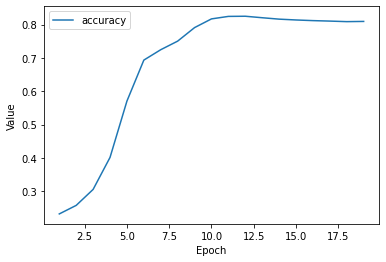

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [0]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8000


[0.40683090686798096, 0.800000011920929]

Epoch 1/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.5915 - precision: 0.3708 - recall: 0.9110
Epoch 2/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.6421 - precision: 0.4008 - recall: 0.8738
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.6849 - precision: 0.4322 - recall: 0.8328
Epoch 4/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7193 - precision: 0.4638 - recall: 0.7921
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7431 - precision: 0.4908 - recall: 0.7523
Epoch 6/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.7669 - precision: 0.5248 - recall: 0.7109
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.7816 - precision: 0.5507 - recall: 0.6824
Epoch 8/20
170/170 [=====================

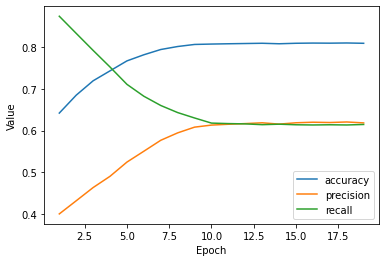

In [0]:

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

Epoch 1/20
170/170 [==============================] - 0s 1ms/step - loss: 1.1686 - accuracy: 0.3158 - precision: 0.0870 - recall: 0.1832
Epoch 2/20
170/170 [==============================] - 0s 1ms/step - loss: 1.0291 - accuracy: 0.3675 - precision: 0.0703 - recall: 0.1253
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 0.9063 - accuracy: 0.4606 - precision: 0.0533 - recall: 0.0692
Epoch 4/20
170/170 [==============================] - 0s 1ms/step - loss: 0.8004 - accuracy: 0.6151 - precision: 0.0419 - recall: 0.0247
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.7416 - precision: 0.0706 - recall: 0.0028
Epoch 6/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7502 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.7492 - precision: 0.2424 - recall: 0.0019
Epoch 8/20
170/170 [=============

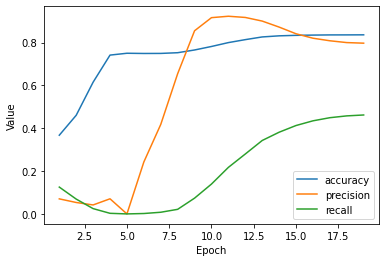

In [0]:

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.52
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops 
# accuracy by about 5%.  Lowering the 
# `classification_threshold` to 0.3 drops accuracy by 
# about 3%. 

Epoch 1/20
170/170 [==============================] - 0s 2ms/step - loss: 0.8774 - auc: 0.3316
Epoch 2/20
170/170 [==============================] - 0s 1ms/step - loss: 0.7829 - auc: 0.3610
Epoch 3/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6994 - auc: 0.4111
Epoch 4/20
170/170 [==============================] - 0s 1ms/step - loss: 0.6285 - auc: 0.5036
Epoch 5/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5698 - auc: 0.6539
Epoch 6/20
170/170 [==============================] - 0s 1ms/step - loss: 0.5233 - auc: 0.7575
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4880 - auc: 0.8018
Epoch 8/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4619 - auc: 0.8207
Epoch 9/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4422 - auc: 0.8290
Epoch 10/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4275 - auc: 0.8332
Epoch 11/20
170/170 [============================

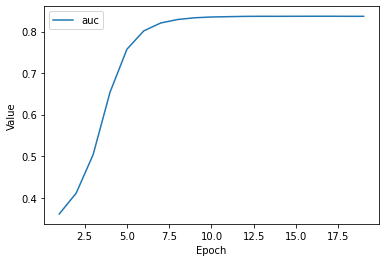

In [0]:

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# normalisasi

In [0]:
def zscore(col):
  mean = 3.04
  std = 1.2
  return (col — mean)/std
feature_name = ‘total_bedrooms’
normalized_feature = tf.feature_column.numeric_column(
  feature_name,
  normalizer_fn=zscore)

# LOANNN

In [0]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 100)
pd.set_option('max_colwidth', 5000)
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)

In [0]:
url = 'https://raw.githubusercontent.com/dosei1/Lending-Club-Loan-Data/master/loans_2007.csv'
loans_2007 = pd.read_csv(url,low_memory=False)
half_count = len(loans_2007) / 2
#loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
#loans_2007 = loans_2007.drop(['url','desc'],axis=1)      # Don't need these columns.

In [13]:
loans_2007.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
loans_2007.loan_status.value_counts()

1    33586
0     5666
Name: loan_status, dtype: int64

In [15]:
drop_columns = []

for col in loans_2007.columns:
    non_null = loans_2007[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
loans_2007 = loans_2007.drop(drop_columns, axis=1)
drop_columns

[]

In [17]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

1    33586
0     5666
Name: loan_status, dtype: int64

0.0    21850
1.0    17402
Name: home_ownership_MORTGAGE, dtype: int64

0.0    39249
1.0        3
Name: home_ownership_NONE, dtype: int64

0.0    39154
1.0       98
Name: home_ownership_OTHER, dtype: int64

0.0    36224
1.0     3028
Name: home_ownership_OWN, dtype: int64

0.0    20531
1.0    18721
Name: home_ownership_RENT, dtype: int64

0.0    22406
1.0    16846
Name: verification_status_Not Verified, dtype: int64

0.0    29379
1.0     9873
Name: verification_status_Source Verified, dtype: int64

0.0    26719
1.0    12533
Name: verification_status_Verified, dtype: int64

0.0    37716
1.0     1536
Name: purpose_car, dtype: int64

0.0    34173
1.0     5079
Name: purpose_credit_card, dtype: int64

0.0    20876
1.0    18376
Name: purpose_debt_consolidation, dtype: int64

0.0    38927
1.0      325
Name: purpose_educational, dtype: int64

0.0    36301
1.0     2951
Name: purpose_home_improvement, dtype: int64

0.0    38880
1.0      372
Na

In [18]:

loans_2007.isnull().sum()

loan_amnt                               0
int_rate                                0
installment                             0
emp_length                              0
annual_inc                              0
loan_status                             0
zip_code                                0
dti                                     0
delinq_2yrs                             0
fico_range_high                         0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                             50
total_acc                               0
last_fico_range_high                    0
home_ownership_MORTGAGE                 0
home_ownership_NONE                     0
home_ownership_OTHER                    0
home_ownership_OWN                      0
home_ownership_RENT                     0
verification_status_Not Verified        0
verification_status_Source Verifie

In [19]:
print(loans_2007.dtypes)
loans_2007.head(2)

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
zip_code                                 int64
dti                                    float64
delinq_2yrs                            float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
last_fico_range_high                   float64
home_ownership_MORTGAGE                float64
home_ownership_NONE                    float64
home_ownership_OTHER                   float64
home_ownership_OWN                     float64
home_ownershi

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
cols = ['emp_length']

for col in cols:
    print(loans_2007[col].value_counts())
    print()

10    8723
0     5614
2     4351
3     4054
4     3395
5     3250
1     3216
6     2202
7     1742
8     1459
9     1246
Name: emp_length, dtype: int64



In [26]:
for name in ['purpose','title']:
    print(loans_2007[name].value_counts())
    print()

KeyError: ignored